<a href="https://colab.research.google.com/github/bilalProgTech/online-data-science-ml-challenges/blob/master/Machine-Hack-CV-Challenge/Fastai-Resnet-152.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/computer_vision_classic_weekend_hackathon_11/Data.zip

--2020-07-12 17:05:38--  https://machinehack-be.s3.amazonaws.com/computer_vision_classic_weekend_hackathon_11/Data.zip
Resolving machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)... 52.219.66.124
Connecting to machinehack-be.s3.amazonaws.com (machinehack-be.s3.amazonaws.com)|52.219.66.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 315463646 (301M) [application/octet-stream]
Saving to: ‘Data.zip’

Data.zip            100%[===================>] 300.85M  13.1MB/s    in 25s     

2020-07-12 17:06:04 (12.0 MB/s) - ‘Data.zip’ saved [315463646/315463646]



In [ ]:
import pandas as pd
import numpy as np

import shutil
import random
import os
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

local_zip = '/content/Data.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('data')
zip_ref.close()

shutil.rmtree('/content/data/__MACOSX')

train = pd.read_csv('/content/data/Data/Train.csv')
test = pd.read_csv('/content/data/Data/Sample_Submission.csv')
train.head()

,File_Name,Category
0,10846.jpg,1
1,2360.jpg,1
2,17531.jpg,0
3,13254.jpg,1
4,15554.jpg,0


In [ ]:
train['Category'] = train['Category'].astype('str')
train['Category'] = train['Category'].replace('0', 'Cats')
train['Category'] = train['Category'].replace('1', 'Dogs')
classes = train.Category.unique().tolist()
print(classes)

train_directory = '/content/data/Data/Train'

files_toshow = []
labels_toshow = []

for class_ in classes:
    path_train = os.path.join('/content/data/Data/Train_')
    if not os.path.exists(path_train):
      os.mkdir(path_train)
    print('Directory Created ', path_train)

    filenames = train.groupby('Category')['File_Name'].get_group(class_).tolist()
    
    files_toshow.append([(path_train + os.sep  + file)
                          for file in filenames[0:5]])
    labels_toshow.append([class_] * 5)
    
    source = [(train_directory + os.sep + class_ + os.sep + file) for file in filenames]
    for f in source:
        shutil.move(f, path_train)
    print('Class ', class_, ' Images Moved in one Folder')

count = 0
for dirname, _, filenames in os.walk('/content/data/Data/Train_'):
    for filename in filenames:
        count = count + 1
print("Total Images in train ", count)

['Dogs', 'Cats']
Directory Created  /content/data/Data/Train_
Class  Dogs  Images Moved in one Folder
Directory Created  /content/data/Data/Train_
Class  Cats  Images Moved in one Folder
Total Images in train  9471


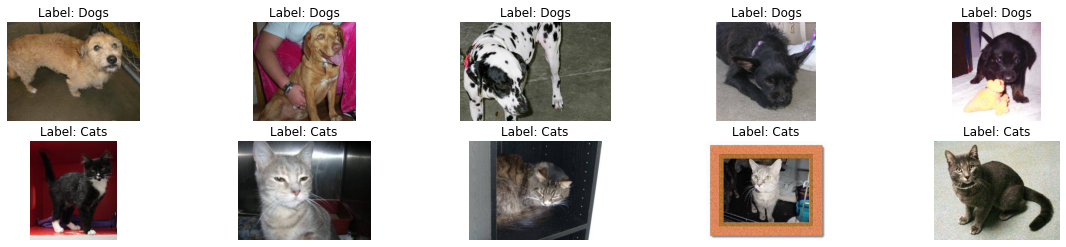

In [ ]:
from matplotlib.cbook import flatten
files = list(flatten(files_toshow))
target_train = list(flatten(labels_toshow))

nrows = 2
ncols = 5
pic_index = 0

fig = plt.gcf()
#plt.figure(figsize=(28,28))
fig.set_size_inches(ncols * 4, nrows * 2)

for i, img_path in enumerate(files):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.title("Label: "+target_train[i])
    plt.imshow(img)

plt.show()

In [ ]:
from fastai.imports import *
from fastai import *
from fastai.vision import *
from torchvision.models import *

In [ ]:
path = '/content/data/Data/'
test_path = path+'Test/'
def get_prediction(learn):
  filename = list(test.File_Name)
  label = []
  for fname in filename:
    img = open_image(test_path+fname)
    label.append(learn.predict(img)[0])
    if (len(label)%400 == 0):
      print(str(len(label)) +' images done!')
  return label

In [ ]:
tfms = get_transforms(do_flip = True,
                      max_lighting = 0.2,
                      max_zoom= 1.1,
                      max_warp = 0.15,
                      max_rotate = 45)
data = ImageDataBunch.from_csv(path, folder= 'Train_',
                               valid_pct = 0.0,
                               csv_labels = '/content/data/Data/Train.csv',
                               ds_tfms = tfms,
                               fn_col = 'File_Name',
                               label_col = 'Category',
                               bs = 16,
                               size = 300).normalize(imagenet_stats)

In [ ]:
fbeta = FBeta(average='weighted', beta = 1)
learn = cnn_learner(data, models.resnet152, metrics=[accuracy, fbeta])
learn.fit(epochs = 15, lr = 5e-5)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [ ]:
test['res_152'] = get_prediction(learn)
test['res_152'] = test['res_152'].astype('int')
test.head()

400 images done!
800 images done!
1200 images done!
1600 images done!
2000 images done!
2400 images done!
2800 images done!
3200 images done!
3600 images done!
4000 images done!


,File_Name,Category,res_152
0,8121.jpg,1,0
1,15486.jpg,1,0
2,8132.jpg,1,0
3,16297.jpg,1,1
4,20838.jpg,1,1


In [ ]:
test.to_csv('resnet152.csv', index=False)